# Topic: Linear regression

Last updated: Tue Nov 11 before session

---

First a short Exercises 4 / Problem 4 addendum:

The weather data could be too irregular for arima (one cannot expect very good results). Instead, one could fit a deep learning model. Those models could be fit into pretty much anything, but they are quite heavy (way heavier than arima) to train and run. If landing a job (say) would depend on how this problem was solved (without deep learning), then a tree-based model (such as random forest) would probably be a relatively good choice. See also our model solutions.

---

And here's another p-value related excerpt from the Forsyth book (Probability and Statistics for Computer Science, start of chapter 7):

*Imagine you believe the mean human body weight is 72 kg. The mean human weight isn’t a random number, but it’s very hard to measure directly. You are forced to take a sample, and compute the sample mean. This sample mean is a random variable, and it will have different values for different samples. You need to know how to tell whether the difference between the observed value and 72 kg is just an effect of variance caused by sampling, or is because the mean weight actually isn’t 72 kg. One strategy is to construct an interval around the sample mean within which the true value will lie for (say) 99% of possible samples. If 72 kg is outside that interval, then very few samples are consistent with the idea that 72 kg is the mean human body weight. If you want to believe the mean human body weight is 72 kg, you have to believe that you obtained a very odd sample.*

The "interval" above refers to the [confidence interval](https://medium.com/towards-data-science/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593), and here's the definition of the p-value (def. 7.1 from Forsyth's book):

*The p-value represents the fraction of samples that would give a more extreme value of the test statistic than that observed, if the hypothesis was true.*

Also (later in the book):

*You can interpret a p-value as the probability that you have accepted a hypothesis that is false.*

A p-value of 0.05 or less is generally considered "good". **However, the assumptions behind the p-value tests are strongly based on the properties of the normal distribution!**

Okay, back to business as usual:

## Support material

- [book chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

- [old course chapter](http://gpspekka.kapsi.fi/dataanalytics/part6/part6.html)

- [sklearn docs](https://scikit-learn.org/stable/index.html)

Below some demonstration codes.

Example 1: Basic linear fit

displaying xy scatter plot


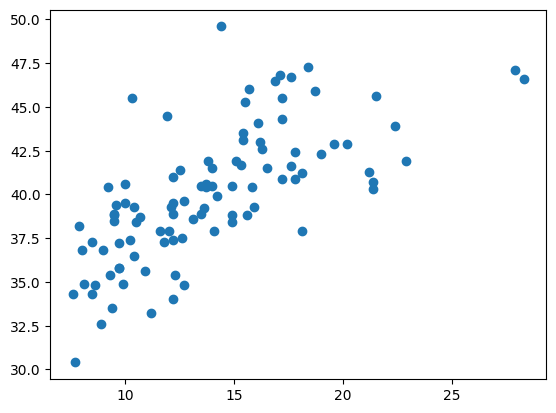

correlation xy [0.68635479]
slope xy [0.60130732]
score xy 0.4710828910096929
displaying xy scatter plot


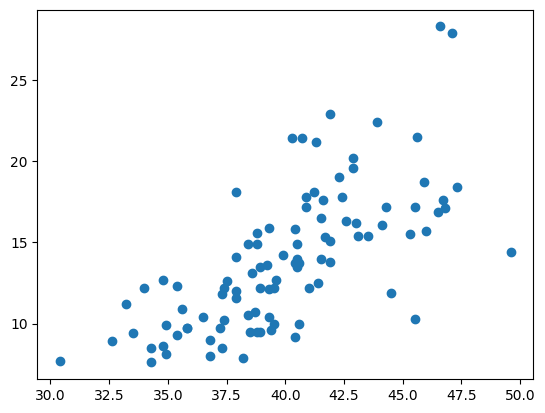

correlation yx [0.68635479]
slope yx [0.78343116]
score yx 0.47108289100969303
slopes multiplied: [0.47108289]
correlation squared: [0.47108289]


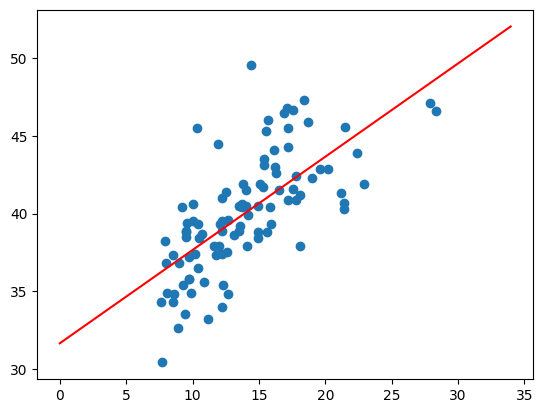

xy scatter with fitted line extended


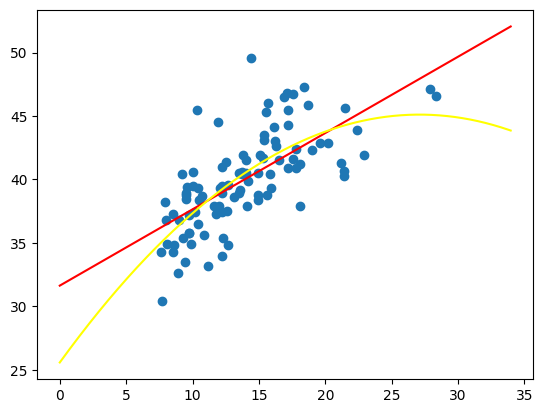

the best parabola fitted as well


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
# the last one is just one way to obtain the correlation coefficient

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# best parabola (linear fit)
# see the book chapter cited above

df = pd.read_excel('/home/varpha/dan/public/exrc_05/data/education_employment.xlsx')
df.columns=['municipality', 'education', 'employment']

X = df['education']
Y = df['employment']

linear_model = LinearRegression()
linear_model.fit(X.to_frame(), Y)
# the regressor seems to want the independent variables e.g. as a frame

print('displaying xy scatter plot')
plt.scatter(X,Y)
plt.show()

slope_xy = linear_model.coef_
print('correlation xy', r_regression(X.to_frame(), Y))
print('slope xy', slope_xy)
print('score xy', linear_model.score(X.to_frame() ,Y))
# the score is the square of the correlation coefficient

plt.clf()
# yeah a plot can be cleared also without the fig,ax syntax

print('displaying yx scatter plot')
plt.scatter(Y,X)
plt.show()

linear_model = LinearRegression()
linear_model.fit(Y.to_frame(), X)
slope_yx = linear_model.coef_
print('correlation yx', r_regression(Y.to_frame(), X))
print('slope yx', slope_yx)
print('score yx', linear_model.score(Y.to_frame() ,X))
print('slopes multiplied:', slope_xy*slope_yx)
print('correlation squared:', r_regression(Y.to_frame(), X)**2)

plt.clf()
linear_model = LinearRegression()
linear_model.fit(X.to_frame(), Y)

x = np.linspace(0, 1.2*max(X),1000) # assume max(X) > 0
y = linear_model.predict(pd.DataFrame(x, columns=['education']))
plt.scatter(X,Y)
plt.plot(x, y, color='red')
plt.show()

print('xy scatter with fitted line extended')

# it seems this is one common way for polynomial fitting
square_model = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
square_model.fit(X.to_frame(),Y)
y2 = square_model.predict(pd.DataFrame(x, columns=['education']))
plt.scatter(X,Y)
plt.plot(x, y, color='red')
plt.plot(x,y2, color='yellow')
plt.show()

print('the best parabola fitted as well')
                                


Example 2: Multivariate linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_excel('./data/shoesize_length_gender.xlsx')
df.columns=['shoesize', 'length', 'gender', 'a', 'b']
df = df.drop(columns=['a','b'])

X = df[['length','gender']]
Y = df['shoesize']

linear_model = LinearRegression()
linear_model.fit(X, Y)
# coefficients = linear_model.coef_
# print(coefficients)
print('score:', linear_model.score(X,Y))

# predict the shoe size of lauri markkanen
# who is a 213cm male
print('markkanen prediction:',
      linear_model.predict(
          pd.DataFrame.from_dict({
              'length': [213],
               'gender':[1]
          })
      )
)

score: 0.8561573043536864
markkanen prediction: [49.27718533]


Example 3: There is a thing called a dot product. It eats two vectors and outputs a number between -1 and 1, expressing how parallel the two vectors are. (0 = perpendicular, 1 = parallel, -1 = opposite directions)

In [ ]:
import numpy as np

# two random vectors of length 10
x = np.random.rand(10)
y = np.random.rand(10)

# here is a formula for covariance
covariance = sum((x - x.mean())*(y - y.mean()))/len(x)
print('covariance:', covariance)

# the covariance formula can be expressed with dot products
# that could help to understand the covariance concept
covariance_another = np.dot(x-x.mean(), y-y.mean())/len(x)
print('another version:', covariance_another)


Example 4: Dot product animation. May work better in a plain notebook environment (or a command line environment).

In [ ]:
#### imports ####

%matplotlib widget
# in a plain notebook environment use %matplotlib notebook
# in a lab environment use %matplotlib widget or %matplotlib ipympl
# (restart your kernel after switching between the two)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import math
# for atan2

#### animation init ####

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

ax.set_xticklabels([])
ax.set_yticklabels([])
# don't want any tick labels into my polar coordinate system

fixed_vector_angle = np.pi/3
fixed_vector_length = 1
# red fixed vector
# say it has length 1
# angle can be arbitrary

fixed_vector_x = fixed_vector_length * np.cos(fixed_vector_angle)
fixed_vector_y = fixed_vector_length * np.sin(fixed_vector_angle)
# also calculate the x and y coordinates of the fixed vector
# (needed in the dot product)

moving_vector_angle = fixed_vector_angle
moving_vector_length = (3/4)*fixed_vector_length
# blue vector moving around
# can fix its length relative to the fixed vector

projection_vector_angle = moving_vector_angle
projection_vector_length = moving_vector_length
# green projection vector

fixed_vector, = ax.plot(
    [fixed_vector_angle, fixed_vector_angle],
    [0, fixed_vector_length],
    color = 'r',
    linewidth = 2
)

moving_vector, = ax.plot(
    [moving_vector_angle, moving_vector_angle],
    [0, moving_vector_length],
    color = 'b',
    linewidth = 2
)

projection_vector, = ax.plot(
    [projection_vector_angle, projection_vector_angle],
    [0, projection_vector_length],
    color = 'g',
    linewidth = 2
)
# plot all the vectors in the initial figure


#### animation update ####

def update(frame_index, angles):
    
    moving_vector_angle = fixed_vector_angle + angles[frame_index]

    moving_vector.set_data(
        [moving_vector_angle, moving_vector_angle],
        [0, moving_vector_length]
    )

    moving_vector_x = moving_vector_length * np.cos(moving_vector_angle)
    moving_vector_y = moving_vector_length * np.sin(moving_vector_angle)
    # calculate the x and y coordinates of the moving vector

    projection_vector_x, projection_vector_y = (
        np.dot(
            [moving_vector_x, moving_vector_y],
            [fixed_vector_x, fixed_vector_y]
        ) / fixed_vector_length**2
    )*np.array([fixed_vector_x, fixed_vector_y])
    # calculate the projection vector via the dot product
    
    projection_vector_length = np.sqrt(projection_vector_x**2 + projection_vector_y**2)
    projection_vector_angle = math.atan2(projection_vector_y, projection_vector_x)
    # calculate the length-angle-representation of the projection vector
    # (needed for the polar plot)
    
    projection_vector.set_data(
        [projection_vector_angle, projection_vector_angle],
        [0, projection_vector_length]
    )
    # plot the projection vector

    title_string = f'(tip of green) x: {projection_vector_x:.2f} y: {projection_vector_y:.2f}'
    ax.set_title(title_string)
    # set title


#### main ####

angles = np.linspace(0, 2*np.pi, 100)
# divide the full revolution into 100 pieces

ani = matplotlib.animation.FuncAnimation(
    fig,
    update,
    frames=len(angles),
    fargs=[angles], interval=10
    # update animation in 10ms intervals
)

plt.show()
# this is probably not needed in jupyter (but it doesn't harm you)


Example 5: Least-squares example

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import pinv

    
#### 2d version: ignore z and fiddle with comments
def least_squares_example():

    x = (0,3,6,7)
    y = (1,4,5,8)
    # z = (2,4,7,9)
    # four points, xy- or xyz-coordinates separated

    A = np.column_stack(((1,1,1,1),x))
    # A = np.column_stack(((1,1,1,1),x,y))
    # the ones are for the intercept
    # more on this in round 7 material

    
    # initialize figure
    fig = plt.figure()
    fig.tight_layout()
    ax = fig.add_subplot(1,1,1)
    # ax = fig.add_subplot(1,1,1, projection='3d')

    ax.scatter(x,y)
    # ax.scatter(x,y,z)

    (c0, c1) = pinv(A)@y
    # (c0, c1, c2) = pinv(A)@z
    # the least-square fit is calculated via a so-called
    # pseudoinverse (more in round 7)

    xx = np.linspace(0,10,100)
    yy = c0 + c1*xx
    # xx, yy = np.meshgrid(np.linspace(0,10,100), np.linspace(0,10,100))
    # zz = c0 + np.dot(np.array((xx,yy)).T, (c1,c2))

    ax.plot(xx,yy)
    # ax.plot_surface(xx,yy,zz)

least_squares_example()


Examples 6 and 7: About the wellness of a linear fit

In [ ]:

# imports

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# main

diabetes = load_diabetes()
# print(type(diabetes))

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# convert an sklearn dataset to a pandas dataframe

# print(df.head())

X = diabetes.data[:, 2].reshape(-1, 1)
# use just bmi as the feature

# print(diabetes.data[:,2])
# print(X)

y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# random seed or not

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("mean squared error: ", mse)
# mse is unit squared specific:
# if your y unit is kilometers, say, and a typical y value
# is like 100km, then your typical square value would be 100*100 = 10000

print("r squared: ", r2_score(y_test, y_pred))
# r squared is unitless (between zero and one)

residuals = y_pred - y_test
# the difference between a predicted and an actual value is called a residual
print('mse again:', sum(residuals**2)/len(residuals))

# below: some tests with residuals

from statsmodels.api import qqplot
qqplot(residuals)

from seaborn import distplot
distplot(residuals)

plt.scatter(X,y)
# this is the best if you can do it


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some random data with a nonlinear relationship
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.5, size=100)

# Fit a linear regression model to the data
model = LinearRegression()
X = pd.DataFrame(x, columns=['x'])
model.fit(X, y)

# Calculate residuals and plot a histogram (in a few different ways)
# in order to examine the residual distribution
residuals = y - model.predict(X)

# plt.hist(residuals)
# plt.title('Histogram of Residuals')
# plt.xlabel('Residual Values')
# plt.ylabel('Frequency')
# plt.show()

# from seaborn import distplot
# distplot(residuals)

# plt.scatter(X,y)
# but this is still the best way (if you can do it)

## On dummy variables

[This link](https://datascience.stackexchange.com/questions/98172/what-is-the-difference-between-one-hot-and-dummy-encoding) should explain it well enough.

## On Bayesian linear regression

It's good to know that such a thing exists. Found a few links (non-member stories):
- [introduction](https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7)
- [case study](https://willkoehrsen.github.io/bayesian/modeling/project/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1/)

In exercises 06 we deal with logistic regression.

That's a *classification* model, although there is the word *regression* in the name. (Misleading, eh?)

One can see linear regression in two different ways:
1. least-squares fit (linear algebra)
2. maximum-likelihood fit (probability / statistics)

These two methods are totally different but lead to the same result.

Logistic regression is much more natural in the setting 2. above. More about that in connection with exercises 06!
